In [2]:
import numpy as np        
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
salesday_trainData = pd.read_csv("Train.csv")
salesday_trainData.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [4]:
salesday_trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
Item_Id             9798 non-null object
Date                9798 non-null object
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [16]:
salesday_trainData.drop('Item_Id', axis = 1, inplace = True)
salesday_trainData.drop('Date', axis = 1, inplace = True)

In [20]:
salesday_trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 7 columns):
State_of_Country    9798 non-null int64
Market_Category     9798 non-null int64
Product_Category    9798 non-null int64
Grade               9798 non-null int64
Demand              9798 non-null float64
Low_Cap_Price       9798 non-null int64
High_Cap_Price      9798 non-null int64
dtypes: float64(1), int64(6)
memory usage: 536.0 KB


In [44]:
salesday_trainData.dtypes

State_of_Country      int64
Market_Category       int64
Product_Category      int64
Grade                 int64
Demand              float64
Low_Cap_Price         int64
High_Cap_Price        int64
dtype: object

In [45]:
salesday_trainData.isna().sum()

State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [17]:
salesday_trainData.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


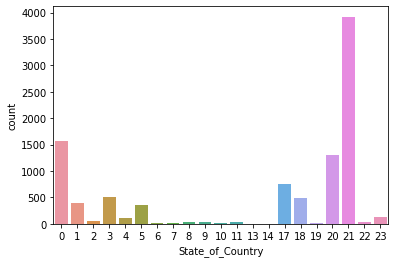

In [18]:
sns.countplot(x="State_of_Country", data=salesday_trainData)

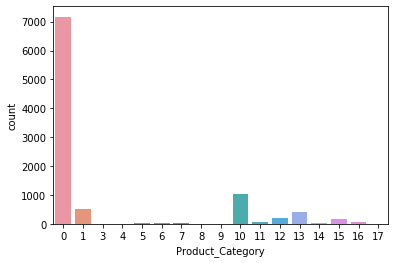

In [19]:
sns.countplot(x="Product_Category", data=salesday_trainData)

In [21]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = salesday_trainData.drop('Low_Cap_Price', axis = 1).columns[:]
x = salesday_trainData.loc[:, col_name]
y = salesday_trainData['Low_Cap_Price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(salesday_trainData.head())
x.head()

   State_of_Country  Market_Category  Product_Category  Grade  Demand  \
0                 0                0                 0      0     0.5   
1                 0                1                 0      0     0.7   
2                 0              103                 0      1     1.6   
3                 0              103                 0      0     0.0   
4                 0              103                 0      2     0.0   

   Low_Cap_Price  High_Cap_Price  
0           2785            4240  
1           3574            4756  
2           5978            9669  
3           5681            8313  
4           4924            7257  


,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,0.0,0.000000,0.0,0.000000,0.000008,0.069515
1,0.0,0.002123,0.0,0.000000,0.000011,0.078313
2,0.0,0.218684,0.0,0.333333,0.000025,0.162083
3,0.0,0.218684,0.0,0.000000,0.000000,0.138962
4,0.0,0.218684,0.0,0.666667,0.000000,0.120957


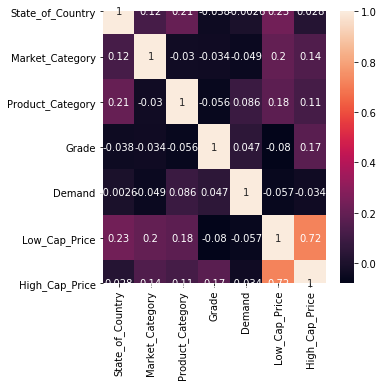

In [27]:
plt.figure(figsize = (5, 5))
sns.heatmap(salesday_trainData.corr(), annot = True)
plt.show()

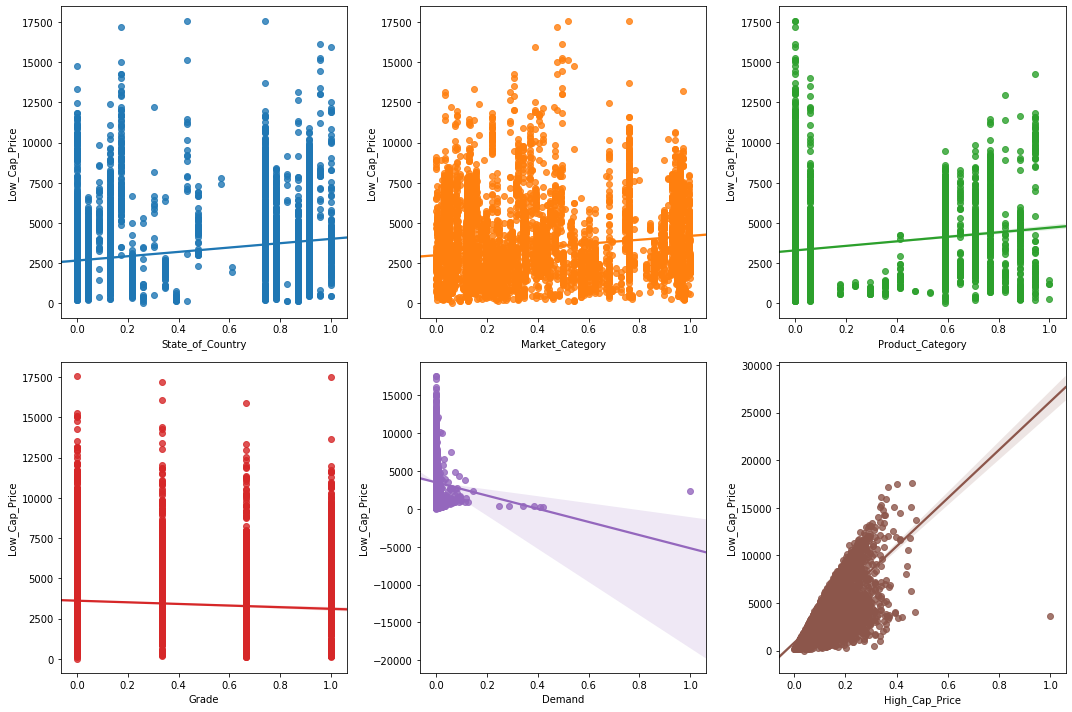

In [32]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['State_of_Country'], ax = axs[0, 0])
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['Market_Category'], ax = axs[0, 1])
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['Product_Category'], ax = axs[0, 2])
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['Grade'], ax = axs[1, 0])
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['Demand'], ax = axs[1, 1])
sns.regplot(y = salesday_trainData['Low_Cap_Price'], x = x['High_Cap_Price'], ax = axs[1, 2])
plt.tight_layout()

In [33]:
from sklearn.model_selection import train_test_split 
features = salesday_trainData.drop('Low_Cap_Price', axis = 1)
target = salesday_trainData['Low_Cap_Price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 42)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (7838, 6)
Train target shape   :  (7838,)
Test features shape  :  (1960, 6)
Test target shape    :  (1960,)


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
    print(features.columns[i], ": ", model.coef_[i])

Model intercept  :  105.11311300693706 

Model coefficient:  [ 4.58903330e+01  8.87838701e-01  2.71752852e+01 -4.06247631e+02
 -5.55649492e-02  4.35863507e-01] 

State_of_Country :  45.89033303804537
Market_Category :  0.8878387012873407
Product_Category :  27.175285169302363
Grade :  -406.2476309820454
Demand :  -0.05556494915329763
High_Cap_Price :  0.43586350714906413


In [69]:
# Model evaluation for training set
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error ,mean_absolute_error
from sklearn import metrics
train_target_pred = model.predict(train_features)
mae = mean_absolute_error(train_target, train_target_pred)  
mse = mean_squared_error(train_target, train_target_pred) 
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)
#score = max(0,(100 - mean_squared_log_error(train_target,train_target_pred) ))

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Low_Cap_Price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
mae = mean_absolute_error(test_target, test_target_pred)  
mse = mean_squared_error(test_target, test_target_pred) 
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)
#score = max(0,(100 - mean_squared_log_error(test_target,test_target_pred) ))

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['Low_Cap_Price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))

      Low_Cap_Price    Predicted   Difference
3574           3051  3063.551748    12.551748
7812            195  -227.510327  -422.510327
1617           5124  4831.265040  -292.734960
4823           2499  1611.936036  -887.063964
3656            411    94.916492  -316.083508
210            3904  3919.515548    15.515548
5358           3581  3348.662968  -232.337032
754            4068  2756.852829 -1311.147171
2930           3744  3685.939511   -58.060489
4634           1222  2377.881576  1155.881576 

Model training performance:
---------------------------
MAE is 946.0723995892281
MSE is 1849420.7819468798
RMSE is 1359.9341094137171
R2 score is 0.6113477385252252


      Low_Cap_Price    Predicted   Difference
96             2006  2367.405048   361.405048
39             3755  3188.160850  -566.839150
6642            715  1726.996187  1011.996187
8091           3848  3340.093064  -507.906936
532            3889  4017.965672   128.965672
2848           2105  2367.209994   262.209994
755

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rfr = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [104]:
rfr.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [105]:
train_target_predicted = rfr.predict(train_features)

In [106]:
mae = mean_absolute_error(train_target, train_target_predicted)  
mse = mean_squared_error(train_target, train_target_predicted) 
rmse = (np.sqrt(mean_squared_error(train_target, train_target_predicted)))
r2 = r2_score(train_target, train_target_predicted)

In [107]:
print("Model training performance:")
print("---------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))
print("\n")

Model training performance:
---------------------------
MAE is 189.36519945564345
MSE is 114605.38973712784
RMSE is 338.53417809303664
R2 score is 0.9759158952179374




In [108]:
test_target_predicted = rfr.predict(test_features)

In [109]:
mae = mean_absolute_error(test_target, test_target_predicted)  
mse = mean_squared_error(test_target, test_target_predicted) 
rmse = (np.sqrt(mean_squared_error(test_target, test_target_predicted)))
r2 = r2_score(test_target, test_target_predicted)

In [111]:
print("Model testing performance:")
print("---------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))
print("\n")

Model testing performance:
---------------------------
MAE is 509.58135741010693
MSE is 784757.0548343208
RMSE is 885.8651448354432
R2 score is 0.8398126395677041




In [120]:
from sklearn.model_selection import GridSearchCV

In [129]:
# Different parameters in random forest

criterion = ['mse', 'mae']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt', 'log2']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # also appendin 'None' in max_depth i.e. no maximum depth to be considered.

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=100,
#                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
#                       warm_start=False)

In [126]:
params

{'criterion': ['mse', 'r2_score'],
 'n_estimators': [100, 200, 300],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, None]}

In [130]:
gs = GridSearchCV(rfr, param_grid=params, n_jobs=2)

In [131]:
gs.fit(train_features, train_target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'criterion': ['mse', 'mae'],
     

In [132]:
gs.best_params_

{'criterion': 'mae',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [136]:
gs.best_score_

0.8437046507164412

In [147]:
train_target_predicted = gs.predict(train_features)

In [148]:
mae = mean_absolute_error(train_target, train_target_predicted)  
mse = mean_squared_error(train_target, train_target_predicted) 
rmse = (np.sqrt(mean_squared_error(train_target, train_target_predicted)))
r2 = r2_score(train_target, train_target_predicted)

In [149]:
print("Model training performance:")
print("---------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))
print("\n")

Model training performance:
---------------------------
MAE is 194.74439163902358
MSE is 121136.68783495117
RMSE is 348.0469621113668
R2 score is 0.9745433553390394




In [150]:
test_target_predicted = gs.predict(test_features)

In [151]:
mae = mean_absolute_error(test_target, test_target_predicted)  
mse = mean_squared_error(test_target, test_target_predicted) 
rmse = (np.sqrt(mean_squared_error(test_target, test_target_predicted)))
r2 = r2_score(test_target, test_target_predicted)

In [152]:
print("Model testing performance:")
print("---------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('Hackathon Score is {}'.format(score))
print("\n")

Model testing performance:
---------------------------
MAE is 496.36421173469387
MSE is 765939.4443971415
RMSE is 875.1796640674082
R2 score is 0.8436537561616944




In [153]:
testData=pd.read_csv('Test.csv')
submissionData=pd.read_csv('sample_submission.csv')

In [154]:
testData.drop('Item_Id', axis = 1, inplace = True)
testData.drop('Date', axis = 1, inplace = True)

In [155]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 6 columns):
State_of_Country    5763 non-null int64
Market_Category     5763 non-null int64
Product_Category    5763 non-null int64
Grade               5763 non-null int64
Demand              5763 non-null float64
High_Cap_Price      5763 non-null int64
dtypes: float64(1), int64(5)
memory usage: 270.3 KB


In [156]:
testData.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,0,3,0,0,0.1,5303
1,0,268,0,2,1.4,10492
2,0,320,0,0,13.4,24706
3,17,358,0,3,5.5,23464
4,18,23,5,2,0.0,6222


In [157]:
prediction = gs.predict(testData)

In [158]:
submissionData.head()

,Item_Id,Low_Cap_Price
0,IT_265079,3536
1,IT_265087,2812
2,IT_265107,2341
3,IT_265139,5977
4,IT_265142,1387


In [159]:
submissionData['Low_Cap_Price']=prediction

In [160]:
submissionData.to_csv('HE_RF_v3.csv',index=False)